# EK381 Exploratory Data Analysis <br> Lab 3: Discrete Random Variables and Fitting Distributions

### This lab was completed by Rawisara Chairat.

Recall that a discrete random variable is simply a random variable whose range can be written as a (countable) list of possible values. These values can chosen arbitrarily, but it is more intuitive to focus on natural numbers (i.e., $0, 1, 2, \ldots$), which appear when we are counting the number of times an event occurs. For example, in this lab, we will show that the important families of random variables introduced in Video 2.5 provide good models for scenarios such as:
- The number of wins out of 10 games for an NBA team playing at home. 
- The number of home games until the first win. 

Overall, we will start by generating synthetic random data, and seeing that the resulting histograms are very close to what we expect from the probability mass function (PMF). Then, we will look at real Win/Loss data from a [real NBA dataset](https://github.com/NocturneBear/NBA-Data-2010-2024/tree/main) that compiles statistics from all games played between 2010 and 2024. 

As usual, we start by loading the necessary packages below. Note the new inclusion of `scipy.stats`, which will allow us to generate random variables from important families, plot their distributions, etc., without needing to type out the formulas ourselves.

In [123]:
#numpy is a package for working with arrays, linear algebra, etc. and stands for "numerical Python".
import numpy as np
#pandas is a package for working with data frames.
import pandas as pd
#matplotlib is a plotting library that mimics Matlab conventions.
import matplotlib.pyplot as plt
#seaborn is a data visualization package.
import seaborn as sns
#scipy.stats is a statistics library
import scipy.stats as st

Let's start by creating some PMF plots using built-in functions. Specifically, let's try to create plots for each of the families of discrete RVs introduced in Video 2.5. In `scipy.stats`, these have intuitive names: `bernoulli` for Bernoulli, `randint` for Discrete Uniform, `binom` for Binomial, `geom` for Geometric, and `poisson` for Poisson. Each distribution has an associated `pmf` function to generate the PMF values for given parameters. 

Let's start with the easiest case, the Bernoulli distribution. This has a single parameter $p$, representing the probability of success (which is represented as a $1$). We will also need to ask for the PMF values over the range of a Bernoulli random variable, which is written as the list `[0,1]` below. (In our mathematical notation, we typically use $[0,1]$ to denote a continuous interval and $\{0,1\}$, but `[0,1]` is the correct syntax for a list in Python.)

In [124]:
p = 0.75
bernoulli_range = [0, 1]
bernoulli_pmf = st.bernoulli.pmf(bernoulli_range,p)
bernoulli_pmf

array([0.25, 0.75])

We can use the command `plt.stem` to plot these values in the same style of stem plot we use in class.

Text(0.5, 1.0, 'Bernoulli(0.75) PMF')

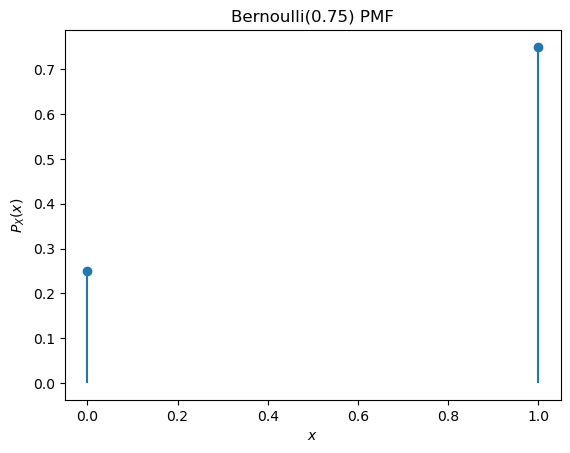

In [125]:
plt.stem(bernoulli_range,bernoulli_pmf,basefmt=" ") #Plot the PMF values
#Note that above, basefmt = " " gets rid of the horizontal line connecting values
#near the x-axis. (You don't need to do this.)
plt.ylabel("$P_X(x)$") #Create the ylabel
plt.xlabel("$x$") #Create the xlabel
plt.title(f"Bernoulli({p}) PMF") 
#The "f" preceding the title string allows the parameter value to plug into the title with {p}.
#You don't need to do use this mode if you don't want to.

#If this and other cells generate a warning about "In Matplotlib 3.3 individual lines
#on a stem plot will be added as a LineCollection instead of individual lines..."
#feel free to ignore it.

Now, let's generate some synthetic Bernoulli data and see how well the histogram corresponds with the PMF. 

In [127]:
num_trials = 1000000 #Number of trials to generate.
bernoulli_trials = st.bernoulli.rvs(p,size=num_trials) #Generate the random variables as a list.
bernoulli_df = pd.DataFrame({"Outcome":bernoulli_trials}) #Convert the list to a pandas DataFrame.
bernoulli_df

,Outcome
0,1
1,1
2,1
3,1
4,1
...,...
999995,0
999996,1
999997,0
999998,0


<Axes: xlabel='Outcome'>

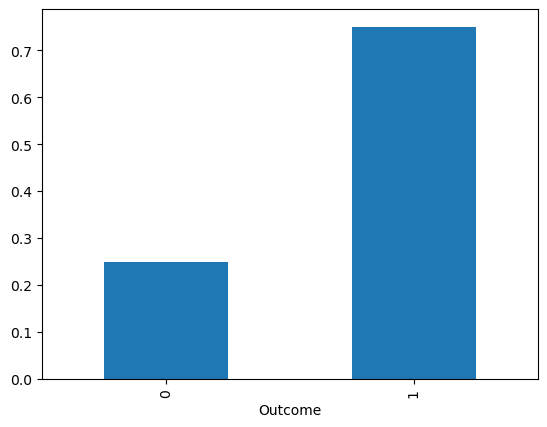

In [128]:
#Plot the histogram. (We need sort_index() to ensure the x-axis is in ascending order.)
bernoulli_df["Outcome"].value_counts(normalize=True).sort_index().plot(kind="bar")

The code below plots the true PMF on top of the empirical histogram. To improve the visualization, we have made the PMF stem plot red. Since we have only run 10 trials initially, these may not agree perfectly. 

Text(0.5, 1.0, 'Bernoulli(0.75) PMF and Histogram for 1000000 Trials')

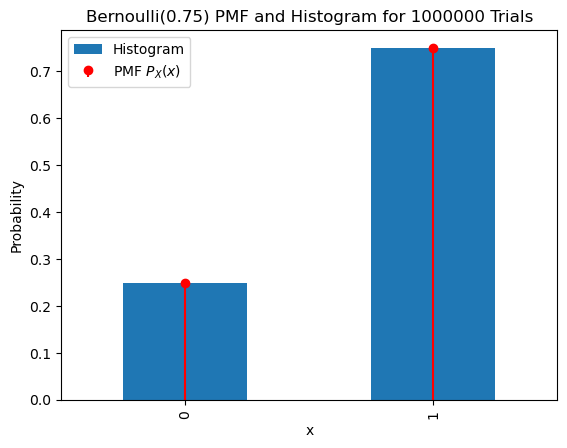

In [129]:
bernoulli_df["Outcome"].value_counts(normalize=True).sort_index().plot(kind="bar")
plt.stem(bernoulli_range,bernoulli_pmf,linefmt="r",markerfmt="ro",basefmt=" ")
plt.legend(["Histogram","PMF $P_X(x)$"])
plt.ylabel("Probability")
plt.xlabel("x")
plt.title(f"Bernoulli({p}) PMF and Histogram for {num_trials} Trials")

---
####  <span style="color:blue">L3.1 Increase the number of trials, regenerate the Bernoulli trials, and replot the histogram with overlaid PMF until they are in close agreement. Make a rough estimate of the minimum number of trials until you see good agreement between the true PMF and empirical histogram? (There are ways of making this  estimate very precise, but we are just trying to get you to notice that it does indeed converge.) </span>
---

#### Answer: 100,000 trials.

Let's now take a look at the mean and variance. We know from Video 2.5 that, if $X$ is Bernoulli$(p)$, then the mean is $\mathbb{E}[X] = p$ and the variance is $\mathrm{Var}[X] = p(1-p)$. It turns out that we can also get these values (for a specific choice of $p$) using the built-in functions `mean` and `var`. Recall that we set `p = 0.75` above, so we should get $\mathbb{E}[X] = \frac{3}{4} = 0.75$ and $\mathrm{Var}[X] = \frac{3}{4}\big(1 - \frac{3}{4}\big) = \frac{3}{16} = 0.1875$.

In [42]:
bernoulli_mean = st.bernoulli.mean(p)
bernoulli_mean

0.75

In [43]:
bernoulli_var = st.bernoulli.var(p)
bernoulli_var

0.1875

We can also get the sample mean $\hat{\mu}$ and sample variance $\hat{\sigma}^2$ from our Bernoulli trial data. The term "sample" refers to the fact that these values are calculated from the data. Say we have collected data $X_1,X_2,\ldots,X_M$ from $M$ trials. The sample mean is just the average of the data,
$$ \hat{\mu} = \frac{1}{M} \sum_{i=1}^M X_i  \ , $$ and the sample variance works similarly, taking the average of the squared deviation of each value from the sample mean,
$$ \hat{\sigma}^2 = \frac{1}{M-1} \sum_{i=1}^M (X_i - \hat{\mu})^2  \ . $$ In Chapter 9, we will study these ideas in more depth (including why the sample variance divides by $M-1$ instead of $M$). For now, the important thing to know is that, under mild assumptions, the sample mean and sample variance converge to the true mean and true variance, respectively, as the number of trials $M$ grows. Let's see this below.

In [44]:
bernoulli_df.mean()

Outcome    0.75017
dtype: float64

In [45]:
bernoulli_df.var()

Outcome    0.187417
dtype: float64

If you have set the number of trials `num_trials` to a large value above, then these data-based estimates should very close to the true mean and variance.

Next, we can try the Binomial distribution. This has a parameter $p$, representing the probability of success, and a parameter $n$, representing the number of trials. The range is now expressed as `range(0,n+1)` below, which yields a list of values $0,1,2,\ldots,n$ due to how Python handles indexing. The code below repeats the process of generating the PMF, trials, and histogram.

Text(0.5, 1.0, 'Binomial(9,0.5) PMF and Histogram for 1000 Trials')

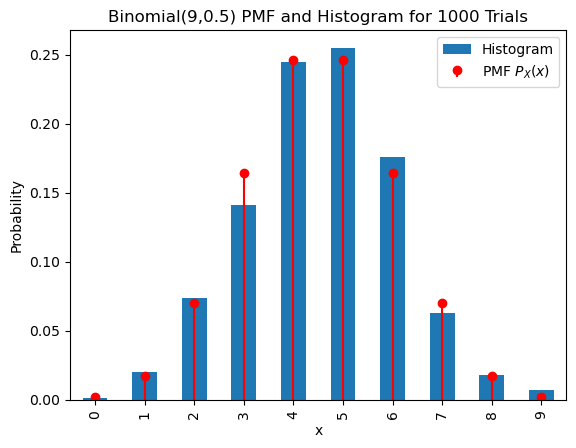

In [111]:
p = 0.5
n = 9
num_trials = 1000
binom_range = np.arange(0,n+1)
binom_pmf = st.binom.pmf(binom_range,n,p)
binom_trials = st.binom.rvs(n,p,size=num_trials) 
binom_df = pd.DataFrame({"Outcome":binom_trials})
#Note that below, we need the reindex command to deal with the likely scenario that some 
#values are not observed in the dataset. For any unobserved values, it fills in the value 0 so
#those entries not skipped over in the x-axis for the histogram.
binom_df["Outcome"].value_counts(normalize=True).reindex(binom_range,fill_value = 0).plot(kind="bar")
plt.stem(binom_pmf,linefmt="r",markerfmt="ro",basefmt=" ")
plt.legend(["Histogram","PMF $P_X(x)$"])
plt.ylabel("Probability")
plt.xlabel("x")
plt.title(f"Binomial({n},{p}) PMF and Histogram for {num_trials} Trials")

---
####  <span style="color:blue">L3.2 Play with the value of $p$ above and then briefly answer the following question: Is the PMF always symmetric?  </span>
---
#### Answer: No, it is not always symmetric.

Below, we display the true mean and variance as well as the estimates from the data. 

In [53]:
st.binom.mean(n,p) #true mean

4.5

In [54]:
st.binom.var(n,p) #true variance

2.25

In [55]:
binom_df.mean() #sample mean from data

Outcome    4.471
dtype: float64

In [56]:
binom_df.var() #sample variance from data

Outcome    2.159318
dtype: float64

Now, let's look at a geometric random variable. The main changes to the code are to change all occurrences of "binom" to "geom" as well as to think a little more bit more carefully about the subset of the range we actually want to plot, since the range of a geometric random variable is infinite. 

Text(0.5, 1.0, 'Geometric(0.5) PMF and Histogram for 1000 Trials')

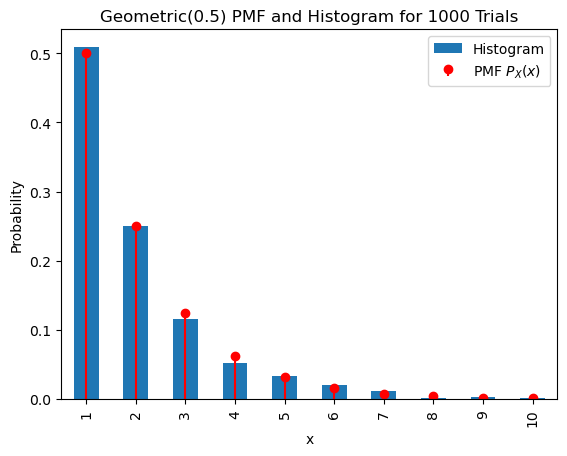

In [62]:
p = 0.5
num_trials = 1000
#The actual range for a geometric random variable is 1,2,3,... but we only want to plot the first
#few values. Therefore, the plot only works with the range 1,2,3,...,10.
geom_range = np.arange(1,11)
geom_pmf = st.geom.pmf(geom_range,p)
geom_trials = st.geom.rvs(p,size=num_trials) 
geom_df = pd.DataFrame({"Outcome":geom_trials})
geom_df["Outcome"].value_counts(normalize=True).reindex(geom_range,fill_value = 0).plot(kind="bar")
plt.stem(geom_pmf,linefmt="r",markerfmt="ro",basefmt=" ")
plt.legend(["Histogram","PMF $P_X(x)$"])
plt.ylabel("Probability")
plt.xlabel("x")
plt.title(f"Geometric({p}) PMF and Histogram for {num_trials} Trials")

---
####  <span style="color:blue">L3.3 Play with the value of $p$ above and then briefly answer the following questions: Is the Geometric PMF always a decreasing function of x? Does the maximum value of the Geometric PMF always occur at $x = 1$? </span>
---
#### Answer: Yes, the Geometric PMF is always a decreasing function and the maximum value of the Geometric PMF always occur at x = 1

---
####  <span style="color:blue">L3.4 Take a look at the data `geom_df` as well as its basic statistics via `geom_df["Outcome"].describe()`. For $p = 0.5$, the true mean is $1/p = 2$. Does the sample mean agree? What is the maximum value in the dataset? Since the PMF decays exponentially, large values will be quite rare, even if we increase the number of trials substantially. </span>
---
#### Answer: The sample mean is 2.014, agreeing with the true mean of 2. The maximum value in the dataset is 12.

In [63]:
geom_df["Outcome"].describe()

count    1000.000000
mean        2.014000
std         1.508005
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: Outcome, dtype: float64

Finally, let's examine the Poisson distribution. The setup is nearly identical to the Geometric distribution, except the parameter is now $\lambda$ (represented below by `lam` since Python reserves `lambda` for a special class of "anonymous" functions, and using this spelling exactly below would cause an error). Recall that $\lambda$ is not a probability, and rather refers to the mean (and the variance!) of a Poisson$(\lambda)$ random variable. Hence, $\lambda$ can be larger than $1$.

Text(0.5, 1.0, 'Poisson(2) PMF and Histogram for 100 Trials')

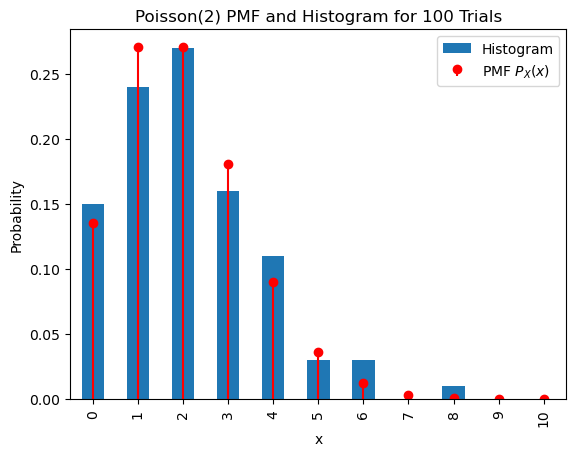

In [65]:
lam = 2 #lambda has a special meaning in python, we can't use the full word without generating an error
num_trials = 100
#The actual range for a Poisson random variable is 1,2,3,... but we only want to plot the first
#few values. Therefore, the plot only works with the range 1,2,3,...,10.
poisson_range = np.arange(0,11)
poisson_pmf = st.poisson.pmf(poisson_range,lam)
poisson_trials = st.poisson.rvs(lam,size=num_trials) 
poisson_df = pd.DataFrame({"Outcome":poisson_trials})
poisson_df["Outcome"].value_counts(normalize=True).reindex(poisson_range,fill_value = 0).plot(kind="bar")
plt.stem(poisson_pmf,linefmt="r",markerfmt="ro",basefmt=" ")
plt.legend(["Histogram","PMF $P_X(x)$"])
plt.ylabel("Probability")
plt.xlabel("x")
plt.title(f"Poisson({lam}) PMF and Histogram for {num_trials} Trials")

---
####  <span style="color:blue">L3.5 Play with the value of `lam` above (representing $\lambda$) and then briefly answer the following question: Is the PMF always a decreasing function of x? (Recall that the parameter `lam` can be greater than $1$, since it does not represent a probability.) </span>
---
#### Answer: No, it is not always a decreasing function of x as can be seen from the chart above when lam = 2.

Now, let's switch to working with real data. The dataset `nbadataset.csv` you downloaded contains an entry for every regular season NBA game played by every team for the 2010-2011 through the 2023-2024 seasons. Specifically, each game appears twice in the dataset, with one row for the home team and another for the away team. The full dataset contains lots of interesting statistics, and you can go [this website](https://github.com/NocturneBear/NBA-Data-2010-2024/tree/main) to download it. For this lab, I've only kept a few columns, including the "WL" column, which contains "W" if the team won the game and "L" if the team lost the game, as well as the "PTS" column, which contains the number of points the team scored in the game. 

(I did spend some time trying to find a good WNBA dataset, but had to leave this for another semester as it will require a bit more initial processing...)

The code below loads the dataset, and plots a histogram for the wins and losses across the whole dataset. There should be an equal number of wins and losses.

<Axes: xlabel='WL'>

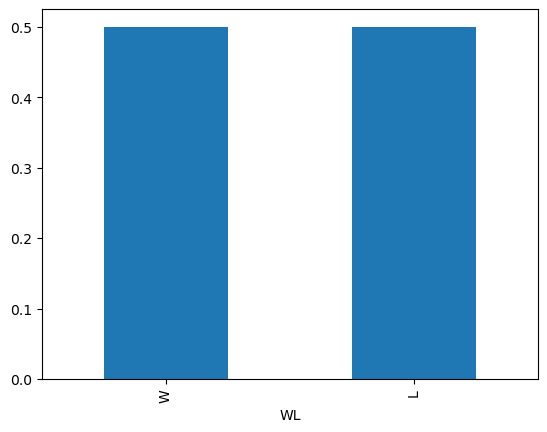

In [66]:
nba_df = pd.read_csv("datasets/nbadata.csv")
nba_df["WL"].value_counts(normalize=True).plot(kind="bar")

Now, let's see if there is noticeable advantage for playing at home, rather than away. Although there is no column that directly lists "Home" and "Away," we can see in the "MATCHUP" column that home games use "vs." and away games use "@." We can split the dataframe using this condition. 

In [85]:
home_df = nba_df[nba_df["MATCHUP"].str.contains("vs.")]
away_df = nba_df[nba_df["MATCHUP"].str.contains("@")]

In [86]:
home_df

,SEASON_YEAR,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,PTS
0,2010-11,Boston Celtics,21000001,2010-10-26T00:00:00,BOS vs. MIA,W,88
3,2010-11,Portland Trail Blazers,21000002,2010-10-26T00:00:00,POR vs. PHX,W,106
5,2010-11,Los Angeles Lakers,21000003,2010-10-26T00:00:00,LAL vs. HOU,W,112
7,2010-11,Cleveland Cavaliers,21000004,2010-10-27T00:00:00,CLE vs. BOS,W,95
9,2010-11,New Jersey Nets,21000005,2010-10-27T00:00:00,NJN vs. DET,W,101
...,...,...,...,...,...,...,...
33307,2023-24,Portland Trail Blazers,22301226,2023-12-08T00:00:00,POR vs. DAL,L,112
33308,2023-24,Boston Celtics,22301227,2023-12-08T00:00:00,BOS vs. NYK,W,133
33310,2023-24,Phoenix Suns,22301228,2023-12-08T00:00:00,PHX vs. SAC,L,106
33313,2023-24,Milwaukee Bucks,22301229,2023-12-07T00:00:00,MIL vs. IND,L,119


---
####  <span style="color:blue">L3.6 Using the `value_counts` command, estimate the probability of a team winning at home, and plot the associated histogram. Is there a noticeable advantage for playing at home? (You will need the value of the win probability for the remainder of the lab.)   </span>
---

#### Answer: The probability of a team winning at home is 0.57636. Thus, there is an advantage for playing at home since it has a higher chance of winning.

In [87]:
home = home_df["WL"].value_counts(normalize=True)
home_win = home["W"] 
home_win

0.5763597070476648

<Axes: xlabel='WL'>

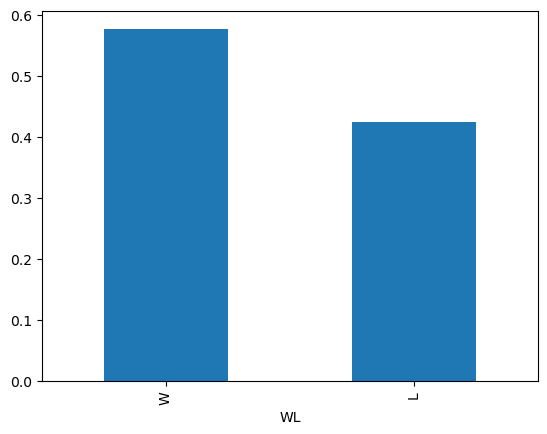

In [74]:
home_df["WL"].value_counts(normalize=True).plot(kind="bar")

Now, let's try to examine some other kinds of random variables. The code below defines `count_games_until_win`, which counts the number of games that its until you see your first win. This should yield data that follows a Geometric distribution. It also defines `count_wins_out_of_n`, which counts the number of wins out of $n$ consecutive games. This should yield data that follows a Binomial distribution. Watch Video 2.5 for more details on these distributions.

(In prior EK381 semesters, we would have focused on having you write these functions, as well as functions to calculate and plot histograms from scratch. This semester we are instead focused on data visualization and analysis, rather than the underlying programming aspects.)

In [75]:
def count_games_until_win(df,column):
    counter = 1
    games_until_win_list = []
    for gameoutcome in df[column]:
        if gameoutcome == "W":
            games_until_win_list.append(counter)
            counter = 1
        else:
            counter += 1
    return pd.Series(games_until_win_list)

In [76]:
def count_wins_out_of_n(df,column,n):
    num_rows = len(df)
    wins_count_list = []
    for i in range(0, num_rows - (num_rows % n), n):
        group_of_n_games = df[column].iloc[i:i+n]
        wins_count_list.append(group_of_n_games[group_of_n_games == "W"].count())
    return pd.Series(wins_count_list)

Let's try a quick example so we can see what these functions actually do.

In [77]:
test_df = pd.DataFrame({"WL":["W","L","W","L","L","L","W","L","L","W","W","W","W","W","W"]})
test_games_until_win = count_games_until_win(test_df,"WL")
test_games_until_win

0    1
1    2
2    4
3    3
4    1
5    1
6    1
7    1
8    1
dtype: int64

In [78]:
n = 3
test_wins_out_of_n = count_wins_out_of_n(test_df,"WL",n)
test_wins_out_of_n

0    2
1    0
2    1
3    3
4    3
dtype: int64

---
####  <span style="color:blue">L3.7 For home games, plot a histogram of the number of wins out of $10$. On the same plot, include a Binomial$(10,p)$ PMF where the value of $p$ is exactly the win probability for home games that you calculated above. How well does the PMF fit the data? </span>
---
Hint: You can and should use the code from earlier in the lab for plotting a Binomial histogram and PMF. The only difference is you will use the output of `count_wins_out_of_n(home_df,"WL",10)`, instead of the synthetic data `binom_df` we had above. 


#### Answer: The PMF doesn't exactly fits the data. There are slight discrepancies where some values are either slightly higher or lower than the histogram.


Text(0.5, 1.0, 'Binomial(10,0.5763597070476648) PMF and Histogram for winning at home')

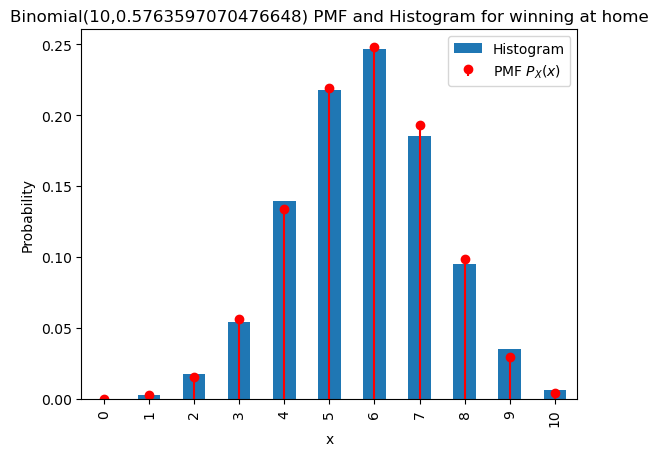

In [91]:
p = home_win
n = 10
num_win = count_wins_out_of_n(home_df,"WL",10)
binom_range = np.arange(0,n+1)
binom_pmf = st.binom.pmf(binom_range,n,p)

num_win.value_counts(normalize=True).reindex(binom_range,fill_value = 0).plot(kind="bar")
plt.stem(binom_pmf,linefmt="r",markerfmt="ro",basefmt=" ")
plt.legend(["Histogram","PMF $P_X(x)$"])
plt.ylabel("Probability")
plt.xlabel("x")
plt.title(f"Binomial({n},{p}) PMF and Histogram for winning at home")

---
####  <span style="color:blue">L3.8 For home games, plot a histogram of the number of games before the first win. On the same plot, include a PMF for a Geometric$(p)$ where the value of $p$ is exactly the win probability for home games you calculated above. How well does the PMF fit the data? </span>
---
Hint: You can and should use the code from earlier in the lab for plotting a Geometric histogram and PMF. The only difference is you will use the output of `count_games_until_win(home_df,"WL")`, instead of the synthetic data `geom_df` we had above. For the range, you can use the 1,2,...,10 range above if you want to keep it simple. Alternatively, you can first find the maximum value that appears in the data, and set the range to go from 1 to that value. 


#### Answer: The PMF fits the data well for most of the data, except from some deviations at x = 1 and x = 2.

Text(0.5, 1.0, 'Geometric(0.5763597070476648) PMF and Histogram for number of games before first win')

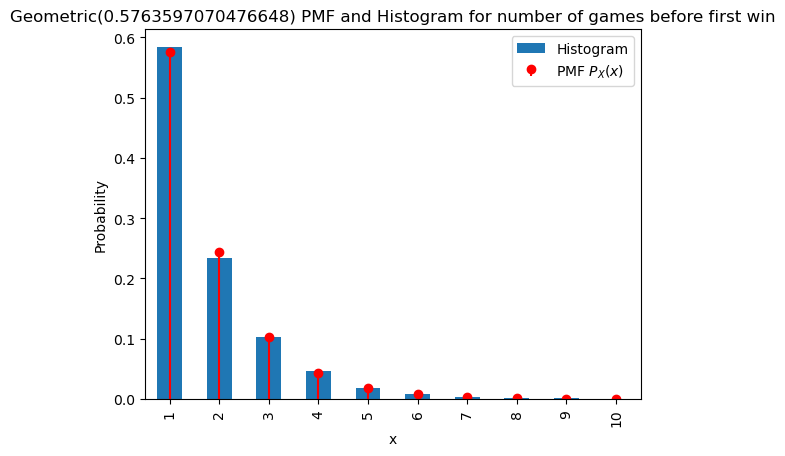

In [93]:
p = home_win
until_win =count_games_until_win(home_df,"WL")
geom_range = np.arange(1,11)
geom_pmf = st.geom.pmf(geom_range,p)
until_win.value_counts(normalize=True).reindex(geom_range,fill_value = 0).plot(kind="bar")
plt.stem(geom_pmf,linefmt="r",markerfmt="ro",basefmt=" ")
plt.legend(["Histogram","PMF $P_X(x)$"])
plt.ylabel("Probability")
plt.xlabel("x")
plt.title(f"Geometric({p}) PMF and Histogram for number of games before first win")

Finally, let's examine the home game performance of a specific team. Below is a listing of all teams in the dataset and code to create a dataframe with only the home games for a specific team. Go ahead and fill in the name of a team to create the dataframe.

In [98]:
home_df["TEAM_NAME"].unique()

array(['Boston Celtics', 'Portland Trail Blazers', 'Los Angeles Lakers',
       'Cleveland Cavaliers', 'New Jersey Nets', 'Philadelphia 76ers',
       'Toronto Raptors', 'Memphis Grizzlies', 'Minnesota Timberwolves',
       'New Orleans Hornets', 'Oklahoma City Thunder', 'Dallas Mavericks',
       'San Antonio Spurs', 'Denver Nuggets', 'Golden State Warriors',
       'Los Angeles Clippers', 'Orlando Magic', 'Utah Jazz',
       'Charlotte Bobcats', 'Detroit Pistons', 'Miami Heat',
       'Phoenix Suns', 'Atlanta Hawks', 'New York Knicks',
       'Indiana Pacers', 'Chicago Bulls', 'Houston Rockets',
       'Milwaukee Bucks', 'Sacramento Kings', 'Washington Wizards',
       'Brooklyn Nets', 'New Orleans Pelicans', 'Charlotte Hornets',
       'LA Clippers'], dtype=object)

In [104]:
myteam = "Boston Celtics" #Put the team name you want in the quotes. It has to exactly match one of the possible names above.
myteam_home_df = home_df[home_df["TEAM_NAME"] == myteam]
myteam_home_df

,SEASON_YEAR,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,PTS
0,2010-11,Boston Celtics,21000001,2010-10-26T00:00:00,BOS vs. MIA,W,88
44,2010-11,Boston Celtics,21000023,2010-10-29T00:00:00,BOS vs. NYK,W,105
114,2010-11,Boston Celtics,21000058,2010-11-03T00:00:00,BOS vs. MIL,W,105
144,2010-11,Boston Celtics,21000073,2010-11-05T00:00:00,BOS vs. CHI,W,110
318,2010-11,Boston Celtics,21000160,2010-11-17T00:00:00,BOS vs. WAS,W,114
...,...,...,...,...,...,...,...
33122,2023-24,Boston Celtics,22301134,2024-04-07T00:00:00,BOS vs. POR,W,124
33188,2023-24,Boston Celtics,22301167,2024-04-11T00:00:00,BOS vs. NYK,L,109
33200,2023-24,Boston Celtics,22301173,2024-04-12T00:00:00,BOS vs. CHA,W,131
33226,2023-24,Boston Celtics,22301186,2024-04-14T00:00:00,BOS vs. WAS,W,132


---
####  <span style="color:blue">L3.9 For your selected team's home games, determine
   - The win probability just as in L3.6.
   - A histogram of the number of wins out of 10 games along with a Binomial PMF just as in L3.7.
   - A histogram of the number of games before the first win along with a Geometric PMF just as in L3.8.
    
Notice that these histograms will not fit as well as before. Comment on why this is the case.
</span>
---

Hint: You can and should use the code from L3.6, L3.7, and L3.8, just changing `home_df` to `myteam_home_df`.

#### Answer: Compared to the one above, the sample size for selecting one team is smaller that selecting all the team. Therefore, it causes the histogram to not as fit as before.

In [130]:
myteam_home = myteam_home_df["WL"].value_counts(normalize=True)
myteam_win = myteam_home["W"]
myteam_win

0.6810810810810811

Text(0.5, 1.0, 'Binomial(10,0.6810810810810811) PMF and Histogram for my team winning at home')

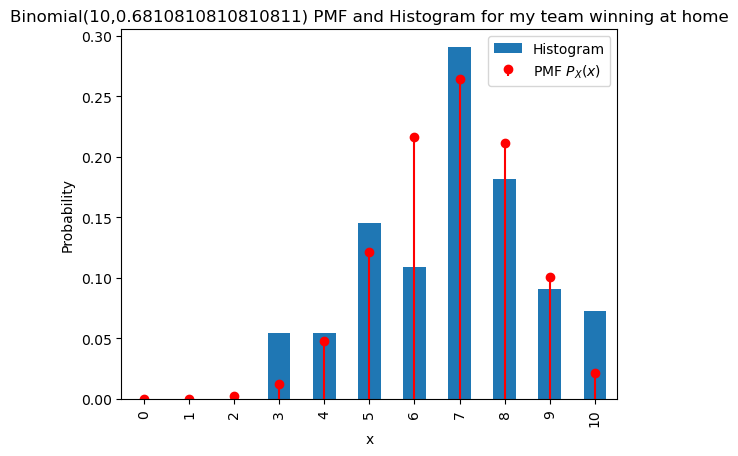

In [131]:
p = myteam_win
n = 10
num_myteam_win = count_wins_out_of_n(myteam_home_df,"WL",10)
binom_range = np.arange(0,n+1)
binom_pmf = st.binom.pmf(binom_range,n,p)

num_myteam_win.value_counts(normalize=True).reindex(binom_range,fill_value = 0).plot(kind="bar")
plt.stem(binom_pmf,linefmt="r",markerfmt="ro",basefmt=" ")
plt.legend(["Histogram","PMF $P_X(x)$"])
plt.ylabel("Probability")
plt.xlabel("x")
plt.title(f"Binomial({n},{p}) PMF and Histogram for my team winning at home")

Text(0.5, 1.0, "Geometric(0.6810810810810811) PMF and Histogram for number of games before Boston Celtics's first win")

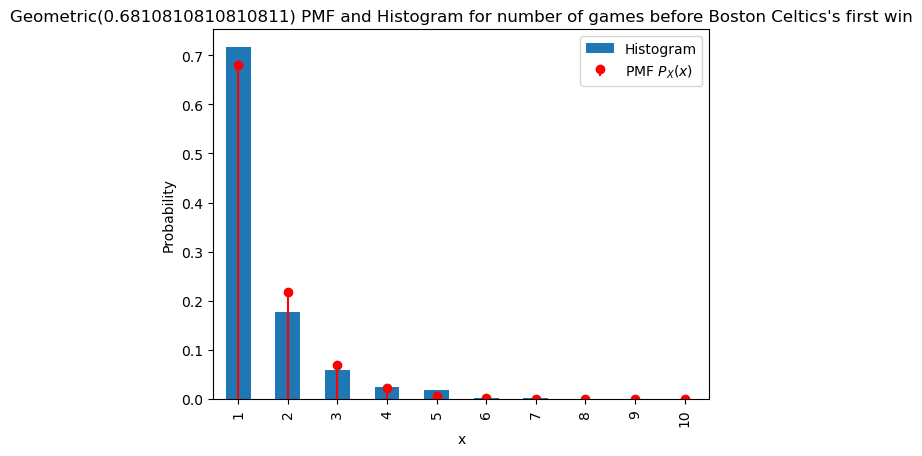

In [132]:
p = myteam_win
until_myteam_win =count_games_until_win(myteam_home_df,"WL")
geom_range = np.arange(1,11)
geom_pmf = st.geom.pmf(geom_range,p)
until_myteam_win.value_counts(normalize=True).reindex(geom_range,fill_value = 0).plot(kind="bar")
plt.stem(geom_pmf,linefmt="r",markerfmt="ro",basefmt=" ")
plt.legend(["Histogram","PMF $P_X(x)$"])
plt.ylabel("Probability")
plt.xlabel("x")
plt.title(f"Geometric({p}) PMF and Histogram for number of games before Boston Celtics's first win")